In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random

In [0]:
# load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_img, train_labels), (test_img, test_labels ) = mnist.load_data()

# normalize imgs
train_img = np.expand_dims(train_img, axis=-1)/255.
train_labels = np.int64(train_labels)
test_img = np.expand_dims(test_img, axis=-1)/255.
test_labels = np.int64(test_labels)


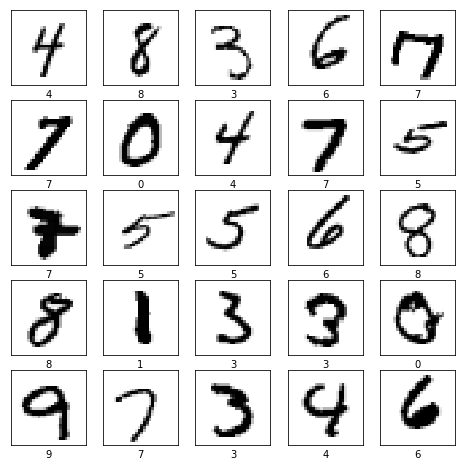

In [37]:
# preview data sets
plt.figure(figsize=(8,8))
random_inds = np.random.choice(60000,25)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [0]:
## Fully Connected Layer
def build_fc_layer():
  
  fc_model = tf.keras.Sequential([
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),

      tf.keras.layers.Dense(10, activation=tf.nn.softmax) ## softmax for classification, 10 digits
  ])
  
  return fc_model

In [31]:
nn = build_fc_layer()
nn.compile( optimizer=tf.train.GradientDescentOptimizer( learning_rate= 1e-1),
            loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn.fit(train_img, train_labels, batch_size=64, epochs=5)
nn.summary()

Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3424 - acc: 0.8970
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1343 - acc: 0.9589
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0949 - acc: 0.9705
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0717 - acc: 0.9782
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0591 - acc: 0.9819
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_19 (Dense)             multiple                  100480    
_________________________________________________________________
dense_20 (Dense)             multiple                  16512     
___________

In [47]:
test_acc = nn.evaluate(test_img, test_labels)[1]
print(test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.0794 - acc: 0.9748
0.9748


## Using CNN as the learning model


In [0]:
def build_cnn_model():
    cnn = tf.keras.Sequential([

        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), input_shape=(28, 28, 1), activation=tf.nn.relu), 

        tf.keras.layers.MaxPool2D(pool_size=(2,2)), 

        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu), 

        tf.keras.layers.MaxPool2D(pool_size=(2,2)), 

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
    ])
    return cnn
  

In [53]:
cnn = build_cnn_model()
cnn.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-1),
            loss="sparse_categorical_crossentropy", metrics=['accuracy'])
cnn.fit(train_img, train_labels, batch_size=64, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 38s 631us/sample - loss: 0.2423 - acc: 0.9240
Epoch 2/5
60000/60000 [==============================] - 38s 638us/sample - loss: 0.0717 - acc: 0.9776
Epoch 3/5
60000/60000 [==============================] - 38s 641us/sample - loss: 0.0503 - acc: 0.9844
Epoch 4/5
60000/60000 [==============================] - 38s 633us/sample - loss: 0.0398 - acc: 0.9877
Epoch 5/5
60000/60000 [==============================] - 38s 638us/sample - loss: 0.0309 - acc: 0.9900


In [55]:
cnn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 900)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               115328    
_________________________________________________________________
dense_34 (Dense)             (None, 10)              

In [58]:
loss, acc = cnn.evaluate(test_img, test_labels)

10000/10000 [==============================] - 2s 247us/sample - loss: 0.0356 - acc: 0.9883
